In [1]:
!pip install catboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
import sklearn
import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#pip install catboost
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_data_6hr = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/6hr_dataset/6hr_re1_Jaipur_train_6h.csv")
test_data_6hr = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/6hr_dataset/6hr_re1_Jaipur_test_6h.csv")
val_data_6hr = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/6hr_dataset/6hr_re1_Jaipur_val_6h.csv")
train_data_1d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/1day_lead_time/6hr_re1_Jaipur_train_1d.csv")
test_data_1d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/1day_lead_time/6hr_re1_Jaipur_test_1d.csv")
val_data_1d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/1day_lead_time/6hr_re1_Jaipur_val_1d.csv")
train_data_3d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/3day_lead_time/6hr_re1_Jaipur_train_3d.csv")
test_data_3d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/3day_lead_time/6hr_re1_Jaipur_test_3d.csv")
val_data_3d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/3day_lead_time/6hr_re1_Jaipur_val_3d.csv")
train_data_5d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/5day_lead_time/6hr_re1_Jaipur_train_5d.csv")
test_data_5d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/5day_lead_time/6hr_re1_Jaipur_test_5d.csv")
val_data_5d = pd.read_csv("/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/5day_lead_time/6hr_re1_Jaipur_val_5d.csv")

In [3]:
train_data_3d.head(2)

,date_time,avg_air_temp,avg_dew_point,avg_relative_humidity,avg_pressure,avg_visibility,energy_loss,fog_duration,fog_month,fog_index,fog_index_6h,fog_index_1d,fog_index_3d
0,1999-12-31 22:00:00,13.036667,10.051667,82.485500,101775.693857,1.776980,1067.138911,12600.0,1,0.084694,0.073025,0.0,0.0
1,2000-01-01 04:00:00,22.105556,7.297222,39.060833,101539.022822,2.056379,1314.447578,18000.0,1,0.073025,0.000000,0.0,0.0


In [4]:
train_cols = ['avg_air_temp', 'avg_dew_point', 'avg_relative_humidity',
       'avg_pressure', 'avg_visibility','fog_month', 'fog_index']

In [5]:
X_train_6hr,y_train_6hr = train_data_6hr[train_cols],train_data_6hr["fog_index_6h"]
X_test_6hr,y_test_6hr = test_data_6hr[train_cols],test_data_6hr["fog_index_6h"]
X_val_6hr,y_val_6hr = val_data_6hr[train_cols],val_data_6hr["fog_index_6h"]
X_train_1d,y_train_1d = train_data_1d[train_cols],train_data_1d["fog_index_1d"]
X_test_1d,y_test_1d = test_data_1d[train_cols],test_data_1d["fog_index_1d"]
X_val_1d,y_val_1d = val_data_1d[train_cols],val_data_1d["fog_index_1d"]
X_train_3d,y_train_3d = train_data_3d[train_cols],train_data_3d["fog_index_3d"]
X_test_3d,y_test_3d = test_data_3d[train_cols],test_data_3d["fog_index_3d"]
X_val_3d,y_val_3d = val_data_3d[train_cols],val_data_3d["fog_index_3d"]
X_train_5d,y_train_5d = train_data_5d[train_cols],train_data_5d["fog_index_5d"]
X_test_5d,y_test_5d = test_data_5d[train_cols],test_data_5d["fog_index_5d"]
X_val_5d,y_val_5d = val_data_5d[train_cols],val_data_5d["fog_index_5d"]

In [6]:
# def data_scaling(X_train,X_test,X_val):
def data_scaling(X_train,X_test,X_val):
  scalem = MinMaxScaler(feature_range = (0, 1))

  X_train_scaled = scalem.fit_transform(X_train.values)
  X_val_scaled  = scalem.fit_transform(X_val.values)
  X_test_scaled = scalem.fit_transform(X_test.values)
  return X_train_scaled,X_test_scaled,X_val_scaled,scalem

In [7]:
df = pd.DataFrame(columns = ['Lead Time','Model Name','RMSE','MSE','MAE','R2 Score'])

In [8]:
def evaluation_metrics(y_test_descaled, y_predicted_descaled):
  #RMSE,MSE,MAE,R2_Score
  mse = round(sklearn.metrics.mean_squared_error(y_test_descaled, y_predicted_descaled),4)
  rmse = round(np.mean((y_predicted_descaled - y_test_descaled)**2)**.5,4)
  r2 = round(r2_score(y_test_descaled, y_predicted_descaled),4)
  mae = round(mean_absolute_error(y_test_descaled, y_predicted_descaled),4)
  # create a dataframe of y_test_descaled,y_predicted_descaled
  output = [rmse,mse,mae,r2]
  return output

In [9]:
def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [10]:
def sub_plots(X_test, y_test,y_pred):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
  # Visualize Model Predictions (Linear Regression)
  axes[0].scatter(X_test, y_test, color='blue', label='Actual Data')
  axes[0].plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')
  axes[0].set_title("Linear Regression: Actual vs. Predicted Per Capita Income")
  axes[0].set_xlabel("Year")
  axes[0].set_ylabel("Per Capita Income")
  axes[0].legend()

Regression Models


In [11]:
models = {
    'LR': LinearRegression(fit_intercept=True),
    'ridge' : Ridge(alpha=1.0,  fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None),
    'xgboost' : XGBRegressor(n_estimators=50, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8),
    'catboost' : CatBoostRegressor(loss_function='RMSE'),
    'lightgbm' : LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split'),
    'gradient boosting' : GradientBoostingRegressor( loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=0.5, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0),
    'lasso' : Lasso(alpha=1.0, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'),
    'random forest' : RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None),
    'Decision Tree':DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0),
    #'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    'knn' : KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
}

In [12]:
def Model_Training(X_train, y_train,X_val, y_val,X_test,y_test,lead):
  X_train,X_test,X_val,scalem = data_scaling(X_train,X_test,X_val)
  for name, model in models.items():
      model.fit(X_train, y_train)
      prediction = model.predict(X_test)
      # y_predicted_descaled = scalem.inverse_transform(prediction)
      row = evaluation_metrics(y_test, prediction)
      row.insert(0, lead)
      row.insert(1, name)
      insert(df, row)

In [13]:
df

,Lead Time,Model Name,RMSE,MSE,MAE,R2 Score


In [14]:
def train(model, X, y, ep, X_val, y_val, name="model"):
  model.compile(optimizer='adam',loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])
  path_checkpoint = "%s_checkpoint.h5"%name
  #EarlyStopping callback to interrupt training when the validation loss is not longer improving.
  es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=3)

  modelckpt_callback = keras.callbacks.ModelCheckpoint( monitor="val_loss", filepath=path_checkpoint, verbose=1, save_weights_only=True, save_best_only=True)

  history = model.fit(X, y, batch_size=64, epochs=ep, verbose=1, validation_data = (X_val, y_val), callbacks=[es_callback, modelckpt_callback])
  #validation_split=0.2, validation_batch_size=64,
  model.summary()
  return model, history

In [15]:
def pred(model, Xt, yt):
  # Xt, yt = split_sequence(X_test, n_steps_in, n_steps_out)
  # Xt = Xt.reshape((Xt.shape[0], Xt.shape[1], 7))
  # model.evaluate(Xt, yt)
  #model.summary()
  yhat = model.predict(Xt, verbose=0)
  return Xt, yt, yhat

In [16]:
def prediction(model,X_test,y_test):
  print(X_test.shape)
  yhat = model.predict(X_test)
  print(yhat.shape)
  row = evaluation_metrics(y_test, yhat)
  row.insert(0, lead)
  row.insert(1, 'ANN')
  insert(df, row)

In [17]:
def ANN_Model_Training(X_train, y_train,X_val, y_val,X_test,y_test,lead):
  X_train,X_test,X_val,scalem = data_scaling(X_train,X_test,X_val)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(120))
  model.add(tf.keras.layers.Dense(60))
  model.add(tf.keras.layers.Dense(1))
  modelname = 'ANN'
  regressor1, history = train(model, X_train, y_train, 25, X_val, y_val)
  return model
  # prediction(model,X_test,y_test)
  # # print(X_test.shape)
  # # yhat = model.predict(X_test)
  # # row = evaluation_metrics(y_test, yhat)
  # # row.insert(0, lead)
  # # row.insert(1, 'ANN')
  # # insert(df, row)

# **Training the model for 6hour,1day,3day,5day**

In [18]:
Model_Training(X_train_6hr,y_train_6hr,X_val_6hr,y_val_6hr,X_test_6hr,y_test_6hr,'6hour')
Model_Training(X_train_1d,y_train_1d ,X_val_1d,y_val_1d,X_test_1d,y_test_1d,'1day')
Model_Training(X_train_3d,y_train_3d ,X_val_3d,y_val_3d,X_test_3d,y_test_3d,'3day')
Model_Training(X_train_5d,y_train_5d ,X_val_5d,y_val_5d,X_test_5d,y_test_5d,'5day')

Learning rate set to 0.056371
0:	learn: 0.0606849	total: 51.5ms	remaining: 51.5s
1:	learn: 0.0598812	total: 54.7ms	remaining: 27.3s
2:	learn: 0.0591789	total: 60.7ms	remaining: 20.2s
3:	learn: 0.0585263	total: 65.4ms	remaining: 16.3s
4:	learn: 0.0579062	total: 72.8ms	remaining: 14.5s
5:	learn: 0.0573116	total: 77.2ms	remaining: 12.8s
6:	learn: 0.0567489	total: 80.7ms	remaining: 11.4s
7:	learn: 0.0562503	total: 85.5ms	remaining: 10.6s
8:	learn: 0.0558101	total: 89.2ms	remaining: 9.82s
9:	learn: 0.0554068	total: 93ms	remaining: 9.2s
10:	learn: 0.0550026	total: 97ms	remaining: 8.72s
11:	learn: 0.0546583	total: 102ms	remaining: 8.37s
12:	learn: 0.0543545	total: 108ms	remaining: 8.22s
13:	learn: 0.0540773	total: 114ms	remaining: 8.05s
14:	learn: 0.0537939	total: 118ms	remaining: 7.77s
15:	learn: 0.0535722	total: 122ms	remaining: 7.5s
16:	learn: 0.0533288	total: 126ms	remaining: 7.26s
17:	learn: 0.0531030	total: 129ms	remaining: 7.04s
18:	learn: 0.0529092	total: 133ms	remaining: 6.88s
19:	le

In [19]:
# model = ANN_Model_Training(X_train_6hr,y_train_6hr,X_val_6hr,y_val_6hr,X_test_6hr,y_test_6hr,'6hour')
# model = ANN_Model_Training(X_train_1d,y_train_1d ,X_val_1d,y_val_1d,X_test_1d,y_test_1d,'1day')
# model = ANN_Model_Training(X_train_3d,y_train_3d ,X_val_3d,y_val_3d,X_test_3d,y_test_3d,'3day')
# model = ANN_Model_Training(X_train_5d,y_train_5d ,X_val_5d,y_val_5d,X_test_5d,y_test_5d,'5day')

In [20]:
df.to_csv('/content/drive/MyDrive/Fog Prediction 24/Long Term Fog Prediction/Long_Term_Result/AllTimeHourPrediction_6hrsampling_Jaipur.csv')

# **Feature Importance**

In [21]:
pip install shap

Mean Squared Error: 0.0033012732271282775


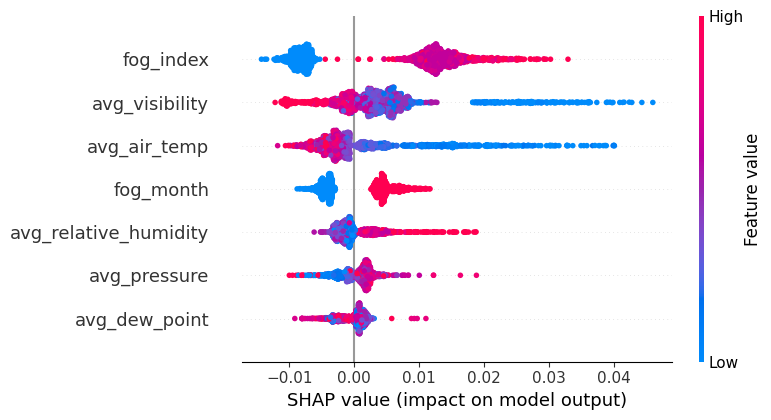

In [22]:
# Create and train the XGBoost model
import shap
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model = xgb.XGBRegressor(n_estimators=50, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train_3d,y_train_3d)

# Predict and evaluate the model
y_pred = model.predict(X_test_3d)
mse = mean_squared_error(y_test_3d, y_pred)
print(f"Mean Squared Error: {mse}")

# Create a SHAP Explainer
explainer = shap.Explainer(model, X_train_3d)

# Compute SHAP values
shap_values = explainer(X_test_3d)

# Summary plot
shap.summary_plot(shap_values, X_test_3d, feature_names=X_test_3d.columns)

# # Dependence plot for a specific feature (e.g., 'RM')
# shap.dependence_plot('RM', shap_values, X_test_3d, feature_names=data.feature_names)

# # Force plot for a specific instance (e.g., the first test instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=X_test_3d.feature_names)